# Milestone P2

Idea 3: Analyzing YouTube’s Evolution into a Professional Platform for Creators
When YouTube was created in 2005, the platform was not professionalized but it became
now for many people, their main source of income. This project explores how YouTube
evolved from a casual video-sharing site into a professional platform for full-time
creators. Using the channel metadata and time-series data, I would analyze how the
average size of successful channels (subscribers and views) has changed over time and
identify signals of professionalization, such as increased upload frequency and consistent
content themes. Additionally, I would explore which content categories (e.g., Gaming,
Education) have seen the most professional growth, using the video metadata to track
shifts in production quality and upload patterns. I’d correlate these changes with the
introduction of monetization features (e.g., AdSense) and algorithm updates, to map out
the timeline of YouTube’s transformation into a career-driven platform.

## Proposition

### Title: The Professionalization of YouTube

### Abstract

This project investigates YouTube's transformation from a casual video-sharing platform into a professional content creation ecosystem. Using comprehensive data (Note Koami: Check the time line spanned by the time serie data!!!), we analyze the evolution of content creation into a viable career path by examining creator posting patterns, content strategies, monetization approaches, production quality, and community management practices. The study leverages channel metrics, engagement data, and growth patterns to identify key transitions in creator professionalization across different content categories. This research aims to provide insights into how YouTube shaped the creator economy and established new paradigms for professional digital content creation.

### Research questions and methodology

#### Research question 1: How has the frequency and consistency of content creation evolved over time across different channel categories?

We aim with this question to track how creators become more "professional" by looking at key aspects of professionalism:

- Regular posting schedules (a key trait of professional content creators)
- Increased content production frequency (indicating full-time commitment)
- Consistency in activity (showing professional dedication)

##### Method

- We mainly focus on two datasets : df_timeseries_en (to analyze frequency and consistency of posting) and df_channels_en (to analyze channel categories and subscriber growth)
- Analysis methodology: 
   - Time series analysis od posting patterns
   - Statistical analysis of posting frequency
   - Correlation between consistency and channel growth

#### Research question 2: How has creator content strategy evolved to reflect professional monetization approaches?

We aim with this question to track how creators adapt to Youtube's monetization features

##### Method

- Datasets
   - video_meta : To analyze engagement metrics, video duration
   - df_timeseries_en : to analyze views and subscribers growth
   - num_comments: to analyze engagement trends
- Analysis methodology: 
   - Analysis of engagement metrics over time
   - Correlation between content optimization and growth
   - Trend analysis of monetization indicators

#### Research question 3: Which categories led YouTube's professionalization, and how did professional practices spread?

##### Method

- Datasets
   - df_channels_en: to analyze category information
   - df_timeseries_en: to analyze growth patterns by category
   - video_meta: to analyze category performance metrics
- Analysis methodology: 
   - Categorical trend analysis
   - Timeline analysis of professional adoption
   - Cross-category comparison of growth patterns

#### Research question 4: How does investment in content production reflect the transition from hobby to profession?

##### Method

- Datasets
   - video_meta: to analyze video duration, quality metrics
   - df_timeseries_en: to analyze channel growth metrics
- Analysis methodology: 
   - Analysis of production quality indicators
   - Correlation between investment and success
   - Time series analysis of quality metrics

#### Research question 5: How has community management evolved from casual interaction to professional engagement strategies?

##### Method

- Datasets
   - num_comments: Analyze comment engagement
   - num_comments_authors: Analyze community interaction patterns
   - df_timeseries_en: Analyze channel growth data
- Analysis methodology: 
   - Analysis of community engagement patterns
   - Correlation between engagement and growth
   - Trend analysis of interaction strategies

# Loading the various datasets 

In [1]:
import matplotlib.pyplot as plt
import zstandard as zstd
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import swifter
import pickle
import random
import gzip
import json
import os

c:\Users\koami\.conda\envs\ada\lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
data_path = "C:/Users/koami/OneDrive/Desktop/Master3/ADA/2024/youniverse_data/"


In [4]:
#Channel data en
df_channels_en = pd.read_csv(os.path.join(data_path, "df_channels_en.tsv.gz"), compression="infer", sep="\t")
print(f"df_channels_en shape: {df_channels_en.shape}")
df_channels_en.head()

df_channels_en shape: (136470, 8)


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [5]:
#Time series data en
df_timeseries_en = pd.read_csv(os.path.join(data_path, "df_timeseries_en.tsv.gz"), compression="infer", sep="\t")
#print(f"df_timeseries_en shape: {df_timeseries_en.shape}")
df_timeseries_en

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [6]:
num_comments = pd.read_csv(os.path.join(data_path, "num_comments.tsv.gz"), compression="infer", sep="\t")
num_comments.head()


,display_id,num_comms
0,SBqSc91Hn9g,0.0
1,UuugEl86ESY,0.0
2,oB4c-yvnbjs,48.0
3,ZaV-gTCMV8E,6.0
4,cGvL7AvMfM0,5.0


In [7]:
num_comments_authors = pd.read_csv(os.path.join(data_path, "num_comments_authors.tsv.gz"), compression="infer", 
                                   sep="\t")
num_comments_authors.head()


,author,video_id
0,1,5
1,2,3
2,3,2
3,4,6
4,5,3


In [3]:
video_meta = pd.read_feather(os.path.join(data_path, "yt_metadata_helper.feather"))
video_meta.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


# Data Processing

### Data cleaning

First, we evaluate the extent of missing values in the data.
We have the following datasets:
- df_channels_en
- df_timeseries_en
- num_comments
- num_comments_authors
- video_meta

The shape of df_channels_en is (136470, 8)


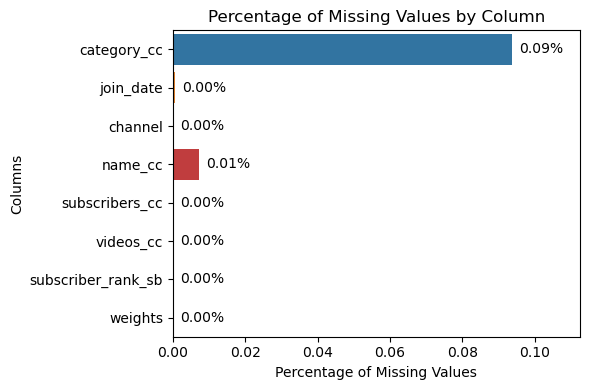

In [38]:
# df_channels_en columns: 
# category_cc: category of the channel.
# join_date: join date of the channel.
# channel: channel id.
# name_cc: name of the channel.
# subscribers_cc: number of subscribers.
# videos_cc: number of videos.
# subscriber_rank_sb: rank in terms of number of subscribers.
# weights: weights calculated for each channel.
print(f"The shape of df_channels_en is {df_channels_en.shape}")
missing_values_df_channels_en = df_channels_en.apply(lambda x: x.isna().sum(axis=0) / df_channels_en.shape[0] * 100)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_df_channels_en.values, y=missing_values_df_channels_en.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
# Add percentage labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 
plt.xlim(0, max(missing_values_df_channels_en.values) * 1.2)
plt.tight_layout()
plt.show()

The shape of df_timeseries_en is (18872499, 10)


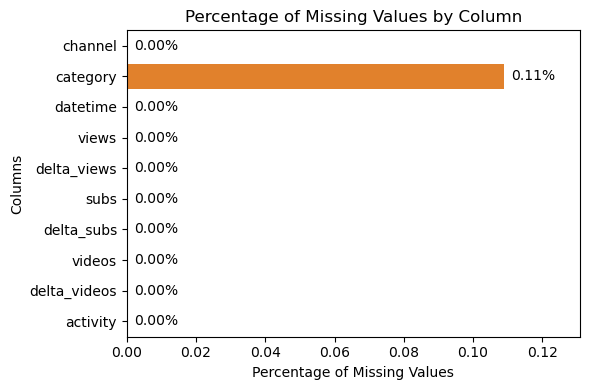

In [40]:
# df_timeseries_en columns: 
# channel: channel id.
# category: category of the channel as assigned by socialblade.com according to the last 10 videos at time of crawl.
# datetime: Week related to the data point.
# views: Total number of views the channel had this week.
# delta_views: Delta views obtained this week. It is the number of views obtained this week.
# subs: Total number of subscribers the channel had this week.
# delta_subs: Delta subscribers obtained this week. It is the number of subscribers obtained this week.
# videos: Total number of videos the channel had this week. It is the cumulative number of videos the channel has uploaded.
# delta_videos: Delta videos obtained this week. It is the number of new videos uploaded this week.
# activity: Number of videos published in the last 15 days.
print(f"The shape of df_timeseries_en is {df_timeseries_en.shape}")
missing_values_df_timeseries_en = df_timeseries_en.apply(lambda x: x.isna().sum(axis=0) / df_timeseries_en.shape[0] * 100)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_df_timeseries_en.values, y=missing_values_df_timeseries_en.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
# Add percentage labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)
plt.xlim(0, max(missing_values_df_timeseries_en.values) * 1.2)
plt.tight_layout()
plt.show()

In [50]:
# num_comments columns: 
# channel: channel id.
# datetime: Week related to the data point.
# num_comments: Total number of comments the channel had this week.
# delta_comments: Delta comments obtained this week.

print(f"The shape of num_comments is {num_comments.shape}")
missing_values_num_comments = num_comments.apply(lambda x: x.isna().sum(axis=0) / num_comments.shape[0] * 100)
print(f"Missing values for num_comments: {missing_values_num_comments}")


The shape of num_comments is (72924794, 2)
Missing values for num_comments: display_id    0.0
num_comms     0.0
dtype: float64


In [49]:
# num_comments_authors columns: 
# channel: channel id.
# datetime: Week related to the data point.
# num_comments: Total number of comments the channel had this week.
# delta_comments: Delta comments obtained this week.

print(f"The shape of num_comments_authors is {num_comments_authors.shape}")
missing_values_num_comments_authors = num_comments_authors.apply(lambda x: x.isna().sum(axis=0) / num_comments_authors.shape[0] * 100)
print(f"Missing values for num_comments_authors: {missing_values_num_comments_authors}")


The shape of num_comments_authors is (448810483, 2)
Missing values for num_comments_authors: author      0.0
video_id    0.0
dtype: float64


The shape of video_meta is (72924794, 8)
categories       0.000000
channel_id       0.000000
dislike_count    2.237179
display_id       0.000000
duration         0.000000
like_count       2.237179
upload_date      0.000000
view_count       0.000897
dtype: float64


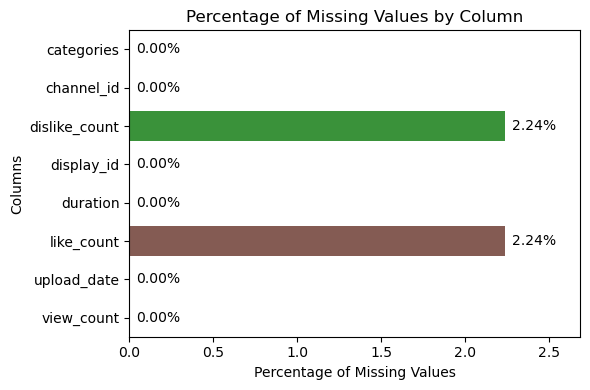

In [46]:
# video_meta columns: 
# channel: channel id.
# datetime: Week related to the data point.
# duration: Duration of the video.
# views: Total number of views the video had this week.
# likes: Total number of likes the video had this week.
# dislikes: Total number of dislikes the video had this week.

print(f"The shape of video_meta is {video_meta.shape}")
missing_values_video_meta = video_meta.apply(lambda x: x.isna().sum(axis=0) / video_meta.shape[0] * 100)
print(missing_values_video_meta)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_video_meta.values, y=missing_values_video_meta.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
# Add percentage labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)
plt.xlim(0, max(missing_values_video_meta.values) * 1.2)
plt.tight_layout()
plt.show()

In general the extent of missing values is not too high (max 4.5%), we can see that the most missing values are in the video_meta dataset. We can afford to drop the missing values.

In [60]:
# Dropping missing values
df_channels_en_cleaned = df_channels_en.dropna()
df_timeseries_en_cleaned = df_timeseries_en.dropna()
num_comments_cleaned = num_comments.dropna()
num_comments_authors_cleaned = num_comments_authors.dropna()
video_meta_cleaned = video_meta.dropna()

In [53]:
print(f"The shape of df_channels_en before cleaning is {df_channels_en.shape}")
print(f"The shape of df_timeseries_en before cleaning is {df_timeseries_en.shape}")
print(f"The shape of num_comments before cleaning is {num_comments.shape}")
print(f"The shape of num_comments_authors before cleaning is {num_comments_authors.shape}")
print(f"The shape of video_meta before cleaning is {video_meta.shape}")

The shape of df_channels_en before cleaning is (136470, 8)
The shape of df_timeseries_en before cleaning is (18872499, 10)
The shape of num_comments before cleaning is (72924794, 2)
The shape of num_comments_authors before cleaning is (448810483, 2)
The shape of video_meta before cleaning is (72924794, 8)


In [55]:
print(f"The shape of df_channels_en after cleaning is {df_channels_en_cleaned.shape}")
print(f"The shape of df_timeseries_en after cleaning is {df_timeseries_en_cleaned.shape}")
print(f"The shape of num_comments after cleaning is {num_comments_cleaned.shape}")
print(f"The shape of num_comments_authors after cleaning is {num_comments_authors_cleaned.shape}")
print(f"The shape of video_meta after cleaning is {video_meta_cleaned.shape}")

The shape of df_channels_en after cleaning is (136331, 8)
The shape of df_timeseries_en after cleaning is (18851915, 10)
The shape of num_comments after cleaning is (72924794, 2)
The shape of num_comments_authors after cleaning is (448810483, 2)
The shape of video_meta after cleaning is (71293336, 8)


# Extract some metrics from the data

*** Note Koami: Some of these metrics might not be easily doable if at all. I will try to see which ones we can do and which ones we can't.

- Research Question 1: Posting Pattern Metrics:
    - Upload frequency (videos per week/month)
    - Time between uploads
    - Consistency score (standard deviation of upload intervals)
    - Activity level (from df_timeseries_en.activity)

- Research Question 2: Content Strategy Metrics:
    - Views per video
    - Like/dislike ratio
    - View-to-subscriber ratio
    - Average video duration
    - Comment-to-view ratio

- Research Question 3: Category Professionalization Metrics:
    - Number of channels per category
    - Average subscriber growth rate
    - Revenue potential indicators (views × engagement)
    - Category growth rate

- Research Question 4: Production Investment Metrics:
    - Video duration trends
    - Upload frequency stability
    - View count improvement
    - Production value indicators (can be derived from duration and engagement)

- Research Question 5: Community Engagement Metrics:
    - Comments per video
    - Unique commenters ratio
    - Comment response patterns
    - Engagement rate (comments + likes per view)

C:\Users\koami\AppData\Local\Temp\ipykernel_9812\168386190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_en_cleaned["datetime"] = pd.to_datetime(df_timeseries_en_cleaned["datetime"])


channel
UChkYqBSmrYsPjOTK2N4pdWg    644.102041
UCstEtN0pgOmCf02EdXsGChw    456.690323
UCcv7pspGHmM7AOywuLM1ufA    454.591667
UCRNmk0RhyeoHOgcB5xxgqBw    443.709677
UCKwucPzHZ7zCUIf7If-Wo1g    415.077419
UCrp_UI8XtuYfpiqluWLD7Lw    410.707692
UCsT0YIqwnpJCM-mx7-gSA4Q    405.200000
UC8yH-uI81UUtEMDsowQyx1g    387.161290
UCPXTXMecYqnRKNdqdVOGSFg    315.464516
UCYPvAwZP8pZhSMW8qs7cVCw    294.673077
Name: delta_videos, dtype: float64


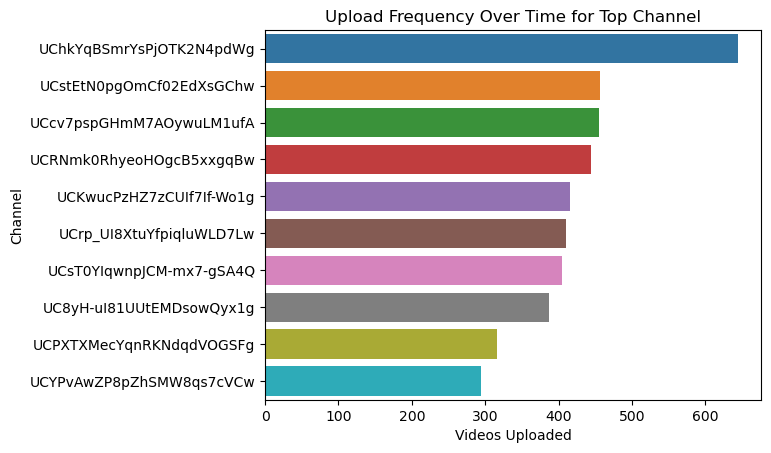

In [82]:
# Upload frequency
df_timeseries_en_cleaned["datetime"] = pd.to_datetime(df_timeseries_en_cleaned["datetime"])
# Calculate average weekly uploads for each channel
# Note Koami: I am not sure if this is the correct way to calculate the upload frequency. Need to check this !!!!
channel_uploads = df_timeseries_en_cleaned.groupby('channel')['delta_videos'].mean().sort_values(ascending=False)
# Get top N channels
top_n_channels = 10
top_channels = channel_uploads.head(top_n_channels)
print(top_channels)
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title(f'Upload Frequency Over Time for Top Channel')
plt.xlabel('Videos Uploaded')
plt.ylabel('Channel')
plt.show()
